## **Not an ideal network**

**Program Name** :                     Not an ideal Network- Updated Version

**Developed and updated by** : EVA Admin & Nihar Kanungo

**Batch**  :                                      EVA Batch 2 Monday 

**Submitted Date** :                     29th July 2019

# Abstract 

This Program describes the "Not an Ideal Network" scenario. That means there must be some code that is not used in ideal conditions. Let's explore the codes line by line and find out the piece of code that makes it not ideal. Once we figure out the code we may try to fix it if possible . 

So let's go ahead and see the codes . For easy understanding of the code we have added comments to each/most of the lines .

==============================================================================================================

**Keras**  is a high level tensorflow API which is widely used for Deep Learning and Computer vision applications of Machine Learning 
The following lines of the code will install keras using pip and import keras and all it's functionalities to the notebook

===============================================================================================================

In [0]:
# Install and import keras to this notebook
# https://keras.io/

!pip install -q keras
import keras

The following cell will import all necessary packages for runnning the algorithm to train the data 

In [0]:
'''
Import 
       numpy                   -   for numerical operations
       Sequential API of keras -   for model training
                Flatten        -   which is used to convert the data into 1D vector
                2D convolution -   for convolution of 2D images
                np_utils                                                and 
                mnist dataset  -   which is a set of handwritten digits)
'''


import numpy as np
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.datasets import mnist

MNIST is a popular dataset which includes all the handwritten digits. MNIST typically comes with Train and Test Split. 

In [0]:
'''
Load the MNIST data into the defined variables 

1. X_train and X_test are the features 
2. y_train & y_test are the target variables  
'''

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


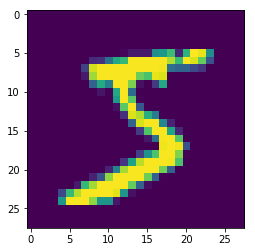

In [38]:
'''
Matplotlib is a very popular package used for data visualization primarily by plotting charts/graphs for Exploratory Data Analytics. 
The visual representation provides a great amount of information to data analysts for future actions to be taken. This notebook has 
been added matplotlib inline to display visualization in the notebook cell 

'''

print (X_train.shape)  # print the shape of the training features
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]) # display the first training data

In [0]:
# Reshapes the training and testing features to 28 * 28 image size with single channel .

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# In Keras the data has to be converted into float 32 . 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''
 Normalization/Standardization is an important aspect of the data/features to ensure that the data points are in a specfic range . The following lines of code 
 will divide each data point in training and testing data by 255 to keep the number with in 0-1 .255 refers to the value of the colors .
'''

X_train /= 255
X_test /= 255

In [41]:

y_train[:10] # display the first 10 training levels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
# The converted target training values after modified as 10-dimensional class matrices. This process is also known as one hot encoding 
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

The Following lines of code are the heart of the model training . it includes
1. Import the Activation function ( Sigmoid, tanh,Relu etc.)
2. Import 2D Maxpooling which can be used in conjuction with the Convolution layer
3. Use multiple convolution functions on the input image
4. Add Flatten Layer
5. Add Softmax Activation to find out the Target with maximum proability 
6. Print the Model Summary
7. Compile the model using 

    a. adam optimizer ( Popular optimizer is SGD) 
    b. Loss function as categorical crossentropy
    c. Evaluation method as Accuracy of the prediction
    
8. Fit the training data using the complied model with the following hyper parameters

    a. Batch size of 32
    b. for 10 iterations for the training data 
    c. An animated progress bar for Verbose=1
    
9. Fit the model with the input data (X_train) against the target (Y_train)
10. Print the Model as trained 
11. Predict the test data using the model trained 
12. Print the prediction



In [44]:
# Import Activation and Maxpooling from keras which would be used for model training  

from keras.layers import Activation, MaxPooling2D
model = Sequential() 


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Input image - 28* 28*1 , Kernel size : 3 * 3 * 1  , No of kernels 32 , Output 26 * 26 * 32

model.add(Convolution2D(64, 3, 3, activation='relu')) # Input image - 26* 26*32 , Kernel size : 3 * 3 * 32  , No of kernels 64 , Output 24 * 24 * 64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Input image - 24* 24*64 , Kernel size : 3 * 3 * 64  , No of kernels 128 , Output 22 * 22 * 128

model.add(MaxPooling2D(pool_size=(2, 2))) # Input image - 22* 22*128 , Max pooling : 2 * 2   , Output 11 * 11 * 256

model.add(Convolution2D(256, 3, 3, activation='relu')) # Input image - 11* 11*256 , Kernel size : 3 * 3 * 256  , No of kernels 256 , Output 9 * 9 * 256

model.add(Convolution2D(512, 3, 3, activation='relu')) # Input image - 9* 9*256 , Kernel size : 3 * 3 * 256  , No of kernels 512 , Output 7 * 7 * 512

model.add(Convolution2D(1024, 3, 3, activation='relu')) # Input image - 7* 7*512 , Kernel size : 3 * 3 * 512  , No of kernels 1024 , Output 5 * 5 * 1024

model.add(Convolution2D(2048, 3, 3, activation='relu'))# Input image - 5* 5*1024 , Kernel size : 3 * 3 * 1024  , No of kernels 2048, Output 3 * 3 * 2048

model.add(Convolution2D(10, 3, 3, activation='relu')) # Input image - 3* 3*2048 , Kernel size : 3 * 3 * 2048  , No of kernels 10 , Output 1 * 1 * 10

model.add(Flatten()) # flattens the matrix/tensor into one dimension

model.add(Activation('softmax')) # Apply the Softmax activation on the output value to find out the class with more weightage

model.summary() # Display the model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

In [0]:
'''
compile the model using the following hyper parameters
    a. adam optimizer ( Popular optimizer is SGD) 
    b. Loss function as categorical crossentropy
    c. Evaluation method as Accuracy of the prediction

'''

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [46]:
# Fit the training data into the model for 10 epochs 

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 222s 4ms/step - loss: 1.2398 - acc: 0.4908
Epoch 2/10
60000/60000 [==============================] - 221s 4ms/step - loss: 1.1852 - acc: 0.5005
Epoch 3/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1697 - acc: 0.5025
Epoch 4/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1668 - acc: 0.5022
Epoch 5/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1629 - acc: 0.5027
Epoch 6/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1672 - acc: 0.5012
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1548 - acc: 0.5039
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1611 - acc: 0.5034
Epoch 9/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.1635 - acc: 0.5026
Epoch 10/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.1610 - a

In [47]:
# Evaluate the test data using the model trained above and find out the validation score
score = model.evaluate(X_test, Y_test, verbose=0)

# print the validation score of the model 
print(score)

# predicted target of the test data 
y_pred = model.predict(X_test)


[1.1707711936950684, 0.4994]


In [48]:

# print the predicted target and the actual target

print(y_pred[:9])
print(y_test[:9])


[[2.5427863e-14 2.5427863e-14 2.5427863e-14 2.5427863e-14 2.5427863e-14
  2.5427863e-14 2.5427863e-14 1.0000000e+00 2.5427863e-14 2.5427863e-14]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0048441e-09 1.0000000e+00 1.0048441e-09 1.0048441e-09 1.0048441e-09
  1.0048441e-09 1.0048441e-09 1.0048441e-09 1.0048441e-09 1.0048441e-09]
 [1.0000000e+00 8.8584066e-13 8.8584066e-13 8.8584066e-13 8.8584066e-13
  8.8584066e-13 8.8584066e-13 8.8584066e-13 8.8584066e-13 8.8584066e-13]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [3.2569356e-10 1.0000000e+00 3.2569356e-10 3.2569356e-10 3.2569356e-10
  3.2569356e-10 3.2569356e-10 3.2569356e-10 3.2569356e-10 3.2569356e-10]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 

**Observation**
---------------------

1. The Training Time of this Model is very high due to 
      i) The Number of Kernels increases for each convolution layer 
      ii) The Total number of parameters increases a  lot for every convolution layer until the receptive
           field becomes the size of the image
2. The model seems to over train  as we are trying to find a lot of edges and gradients from images of 
     28 * 28 size
3. The Number of classes are 10 where as we are using a lot of kernels ( 32- 2048 ). That creates a lot of image in the memory and the processor becomes very slow due to excessive use of the memory
4. The Accuracy of the model is less as the model over trains itself 

**Major Problem Identified **

The Model directly lowers the number of kernels from 2048 to 10. This takes out all the major learnings that the model learned by performing multiple convolution operations. Hence the accuracy is very low 

**Fix**

It's important to preserve the understanding/learning by using a 1*  1 kernel and 10 of them. By doing this we will fit the features of all those 2048 channels into 10 and then perform a convolution of 3* 3 and 10 of them in order to map it to the number of output classes.

The following is the code which fixed the problem and got a better accuracy

---


      



In [50]:

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu')) 

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

y_pred = model.predict(X_test)

print(y_pred[:9])
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.2364 - acc: 0.9261
Epoch 2/10
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0652 - acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0511 - acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0416 - acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0347 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0308 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0270 - acc: 0.9927
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0267 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0225 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0233 - a

In [51]:
print(score)

[0.03809279111000642, 0.9914]


***We are not yet there ***

After Training the above model i was thinking to have corrected all the issues of the 1st model as the accuracy of the above model is not bad . But I was surprised to know that I was wrong . The actual problem of the model was not that . Let's run the 1st model as it's with a very small fix and see how it works. If it performs well then we will figure out what changes we did to the first model to get a better accuracy.

So let's run the below network.


In [53]:
# Import Activation and Maxpooling from keras which would be used for model training  

model = Sequential() 


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Input image - 28* 28*1 , Kernel size : 3 * 3 * 1  , No of kernels 32 , Output 26 * 26 * 32

model.add(Convolution2D(64, 3, 3, activation='relu')) # Input image - 26* 26*32 , Kernel size : 3 * 3 * 32  , No of kernels 64 , Output 24 * 24 * 64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Input image - 24* 24*64 , Kernel size : 3 * 3 * 64  , No of kernels 128 , Output 22 * 22 * 128

model.add(MaxPooling2D(pool_size=(2, 2))) # Input image - 22* 22*128 , Max pooling : 2 * 2   , Output 11 * 11 * 256

model.add(Convolution2D(256, 3, 3, activation='relu')) # Input image - 11* 11*256 , Kernel size : 3 * 3 * 256  , No of kernels 256 , Output 9 * 9 * 256

model.add(Convolution2D(512, 3, 3, activation='relu')) # Input image - 9* 9*256 , Kernel size : 3 * 3 * 256  , No of kernels 512 , Output 7 * 7 * 512

model.add(Convolution2D(1024, 3, 3, activation='relu')) # Input image - 7* 7*512 , Kernel size : 3 * 3 * 512  , No of kernels 1024 , Output 5 * 5 * 1024

model.add(Convolution2D(2048, 3, 3, activation='relu'))# Input image - 5* 5*1024 , Kernel size : 3 * 3 * 1024  , No of kernels 2048, Output 3 * 3 * 2048

model.add(Convolution2D(10, 3, 3)) # Input image - 3* 3*2048 , Kernel size : 3 * 3 * 2048  , No of kernels 10 , Output 1 * 1 * 10

model.add(Flatten()) # flattens the matrix/tensor into one dimension

model.add(Activation('softmax')) # Apply the Softmax activation on the output value to find out the class with more weightage

model.summary() # Display the model summary


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

y_pred = model.predict(X_test)

print(y_pred[:9])
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykern

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

In [54]:
print(score)

[0.03655209561262977, 0.9915]


Wow ! . The Score is now 99.15% . How did that happen ? Now let's compare the 1st Network and 3rd Network to see who was the villian .

Did we spot it correctly ? No ? Let's do a close comparision again . I am sure this time we found it .

Yes it's none other than the Activation function relu which was used in the layer just before taking the softmax in the 1st Network .

But why ? It's because relu throws away all negative values and makes it zero. Now when the softmax function sees this value it has no idea how negative that number was ? So it gives same importance to zeros which were actually negative numbers .

That makes the network weak in learning and gives a very poor Training and validation accuracy 

***Summary ***


The following points to be considering while designing a Convolution model 

1. The Size of kernels and number of kernels for each convolution layer must be carefully decided 
2. The Number of kernels must be in line with the number of classes ( must not be less , must not be high)
3. The Hyper parameters must be choosen based on experience and learnings from multiple outcomes 
4. The Optimizer and Loss function must be choosen carefully and based on the data we are trying to fit 
5. Proper Normalization technique must be used   and now the most important
6. DON'T EVER USE "relu " IN THE LAYER JUST BEFORE YOU TAKE SOFTMAX 

The Process of getting the best fit model is also iterative in nature and data hungry. Care must be taken to get a perfect fit model and not an overfit or underfit one 



*********************************************************************************************************************************